In [27]:
import pysam

In [28]:
def collapse(seq):
    seq = seq.get_reference_positions()
    try:
        j = seq[0]
    except IndexError:
        return []
    segments = []
    segment = [j]
    for i in seq[1:]:
        if i == j + 1:
            pass
        else:
            segment.append(j)
            segments.append(segment)
            segment = [i]
        j = i
    try:
        segment.append(i)
        segments.append(segment)
    except UnboundLocalError:
        pass
    return segments

In [38]:
#print(len(i.seq))
#print(i.get_reference_sequence())

In [42]:
cells_transcripts = {}

In [ ]:
{"cell_barcode" : "count of unique UMIs"}

In [43]:
import collections

In [44]:
transcripts_counts = collections.Counter({})

In [60]:
transcripts = {}

In [61]:
{"Cell_barcode + UMI_barcode" : "how many sequencing reads"}

{'Cell_barcode + UMI_barcode': 'how many sequencing reads'}

In [62]:
with pysam.AlignmentFile("MALAT1.bam", "rb") as f:
    it = f.fetch()
    for i in it:
        #print(i)
        #print(i.get_reference_positions())
        #print(i.get_aligned_pairs())
        #print(dir(i))
        #print(i.seq)
        #print(len(i.seq))
        #print(i.get_refe        #print(i)
        #print(i.get_reference_positions())
        #print(i.get_aligned_pairs())
        #print(dir(i))
        #print(i.seq)
        #print(len(i.seq))
        #print(i.get_reference_sequence())
        #print(len(i.get_reference_sequence()))
        #print(i.reference_name)
        #print(collapse(i))
        #print(type(i))
        #print(i)
        #print()rence_sequence())
        #print(len(i.get_reference_sequence()))
        #print(i.reference_name)
        #print(collapse(i))
        #print(type(i))
        #print(i)
        #print()
        t = i.tags
        _, molecular_barcode = t[-1]
        #print(i.tags)
        _, cell_barcode = i.tags[-2]
        #print(molecular_barcode)
        #print(cell_barcode)
        transcripts_counts[(cell_barcode, molecular_barcode)] += 1
        try:
            transcripts[(cell_barcode, molecular_barcode)].append(i.seq)
        except:
            transcripts[(cell_barcode, molecular_barcode)] = [i.seq]
        #break

In [64]:
#unique transcript: "CTCCGTC"

In [65]:
#"CTCCGTC", "CTCCGTC", "CTCGGTC", "CTCCGTC", "CTCCGTC" "CTCCGTC"

In [69]:
transcripts_sorted = sorted([(len(j), j) for i, j in transcripts.items()], reverse=True)

In [71]:
transcripts_sorted[:10]

[(33,
  ['AGGCATTGAGGCCGCCAGCGCAGGGGCTTCTGCTGAGGGGGCAGGCGGAGCTTGAGGAAACCGCAGATAAGTTTTTTTCTCTTTGAAAGATAGAGATTAATACAACTACTT',
   'AGGCATTGAGGCAGCCAGCGCAGGGGCTTCTGCTGAGGGGGCAGGCGGAGCTTGAGGAAACCGCAGATAAGTTTTTTTCTCTTTGAAAGATAGAGATTAATACAACTACTT',
   'AGGCATTGAGGCAGCCAGCGCAGGGGCTTCTGCTGAGGGGGCAGGCGGAGCTTGAGGAAACCGCAGATAAGTTTTTTTCTCTTTGAAAGATAGAGATTAATACAACTACTT',
   'GGTTACTAAGATATTGCTTAGCGTTAAGTTTTTAACGTAATTTTAATAGCTTAAGATTTTAAGAGAAAATATGAAGACTTAGAAGAGTAGCATGAGGAAGGAAAAGATAAAGGTTTCTAAAACATGACGGAGGTTGAGATGAAGCTTCTT',
   'ACGTAATTTTAATAGCTTAAGATTTTAAGAGAAAATATGAAGACTTAGAAGAGTAGCATGAGGAAGGAAAAGATAAAAGGTTTCTAAAACATGACGGAGGTTGAGATGAAGCTTCTTCATGGAGT',
   'GCTTAAGATTTTAAGAGAAAATATGAAGATTTAGAAGAGTAGCATGAGGAAGGAAAAGATAAAAGGTTTCTAAAACATGACGGAGGTTGAGATGAAGCTTCTTCATGGAGT',
   'GCTTAAGATTTTAAGAGAAAATATGAAGATTTAGAAGAGTAGCATGAGGAAGGAAAAGATAAAAGGTTTCTAAAACATGACGGAGGTTGAGATGAAGCTTCTTCATGGAGT',
   'CCTTGAAATCCATGACGCAGGGAGAATTGCGTCATTTAAAGCCTAGTTAACGCATTTACTAAACGCAGACG',
   'GATTAATTGGGAGTGCTAGGATGAAACAATTTG

In [ ]:
1 cell
100 transcripts
100000 reads

In [56]:
2**17

131072

In [50]:
import matplotlib.pyplot as plt

In [51]:
%matplotlib inline

(array([  1.51856000e+05,   2.42480000e+04,   7.35700000e+03,
          9.91000000e+02,   2.64000000e+02,   2.80000000e+01,
          8.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([  1. ,   4.5,   8. ,  11.5,  15. ,  18.5,  22. ,  25.5,  29. ,
         32.5,  36. ]),
 <a list of 10 Patch objects>)

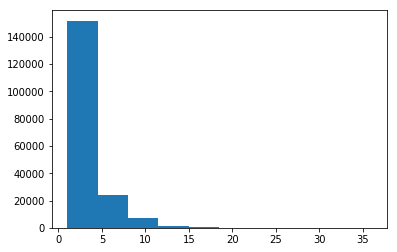

In [53]:
plt.hist([j for i, j in transcripts_counts.items()])

In [58]:
sorted([j for i, j in transcripts_counts.items()], reverse=True)

[36,
 29,
 26,
 25,
 24,
 23,
 23,
 23,
 23,
 22,
 22,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,


In [ ]:
cell + umi

In [ ]:
f = file.open()
do something with f
f.close()

In [ ]:
with file.open as f:
    do something